# CNN example

In [1]:
import keras

Using TensorFlow backend.


In [2]:
print(keras.__version__)

2.2.4


# Loading Dataset
### Download mnist data and split into train and test sets

In [3]:
from keras.datasets import mnist

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
print(f'{x_train},\n\n{y_train}')

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]],

[5 0 4 ... 5 6 8]


# Exploratory Data Analysis

In [6]:
import matplotlib.pyplot as plt 

# plot the first image in the dataset
plt.imshow(x_train[0])

In [7]:
# check image shape
x_train[0].shape

(28, 28)

In [8]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

# pre-processing
## reshape data to fit model

In [9]:
x_train = x_train.reshape(60000,28,28,1)

x_test = x_test.reshape(10000,28,28,1)

In [10]:
print(f'{x_train},\n\n{x_test}')

[[[[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  ...

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]]


 [[[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  ...

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]]


 [[[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  ...

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]]


 ...


 [[[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]

In [11]:
from keras.utils import to_categorical #(인코딩)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [12]:
print(f'{y_train},\n\n{y_test}')

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]],

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


# model builing
### Sequential Model
#### 케라스로 가장 쉽게 만들수 있는 모델
#### 층층으로 모델을 만들수 있게 함

# Libraries for CNN

In [13]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

In [14]:
model = Sequential()

# feature extraction
### convolutinal Layer
#### 2차 메트릭스의 이미지를 처리하는 필터들을 포함
#### 64 and 32 - 데이터셋의 사이즈에 따라 각층에 있는 노드의 갯수를 조정
#### Kernel size - 컨볼루션을 위한 필터행렬의 크기
#### Activation function - ReLU
#### Input shape - 첫번째 레이어에서만 지정/ 1은 이미지가 흑백 / 3은 컬러

### Flatten Layer
#### 컨볼루션과 덴스레이어 사이를연결

In [15]:
model.add(Conv2D(64, 
                 kernel_size=3,
                 activation='relu', 
                 input_shape=(28,28,1))) # 1: black/white, 3: RGB
model.add(Conv2D(32, 
                 kernel_size=3, 
                 activation='relu'))
model.add(Flatten())

# neural network
## Dense Layer
### 출력 레이어에 사용
### 10개의 노드는 0~9까지 출력
### 출력의 확률의 합은1. 활률을 기초로 예측

In [16]:
model.add(Dense(10, activation='softmax')) #hidden 

# Compile
### Optimizer - 옵티마이저가 학습률을 조절. 적은 학습률일수록 더 정확한 가중치를 찾아내지만, 오래 걸림. 아담옵티마이저는 훈련하는 동안 학습률을 조절함
### Loss function - 점수가 낮을수록 모델의 성과가 좋음. 분류문제에 가장 좋은 categorical_crossentropy

In [17]:
model.compile(optimizer='adam', # Adam이 가장 효율이 좋아 이거를 쓴다.
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Training Model
## epochs - 데이터를 가지고 한번 포워드, 백워드 계산을 하는 수. 
## epochs 횟수가 많아질수록 모델이 향상됨. 
## 어떤 지점에 이르면 값이 수렴되며 더이상 향상되지 않음

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/3





60000/60000 [==============================] - 55s 914us/step - loss: 14.6587 - acc: 0.0905 - val_loss: 14.6804 - val_acc: 0.0892
Epoch 2/3
60000/60000 [==============================] - 56s 932us/step - loss: 14.6618 - acc: 0.0903 - val_loss: 14.6804 - val_acc: 0.0892
Epoch 3/3
60000/60000 [==============================] - 53s 888us/step - loss: 14.6618 - acc: 0.0903 - val_loss: 14.6804 - val_acc: 0.0892


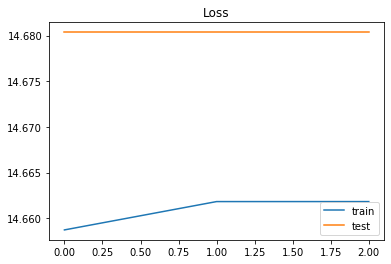

[14.680361064147949, 0.0892]

In [18]:
history = model.fit(x_train, 
                    y_train, 
                    validation_data=(x_test, y_test),
                    epochs=3)

import matplotlib.pyplot as plt
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

model.evaluate(x_test,  y_test, verbose=2)

## batch size -
## 한번 훈련할때 사용하는 데이터의 갯수
## 2000개의 데이터를 가지고 500개의 배치로 나눠서 모델을 만드는 경우 
## 500개씩 4개의 데이터셋이 있고
## 각 세트마다 1개의 epochs을 거치게되며
## 전체 4번의 epochs 횟수를 가지게된다.

model.fit(x_train,
          y_train,
         batch_size=32,
         validation_split=.1)

# verbose -
## 훈련과정을 어떻게 보고 싶은지 결정
## ▪verbose=0 will show nothing 아무것도 안보임
## ▪verbose=1 will show an animated progress bar 진행바를 보여줌
## ▪verbose=2 will show the number of epoch 진행수를 보여줌 

history = model.fit(x_train,
                    y_train,
                    batch_size=128,
                    epochs=12,
                    verbose=1, # 진행바를 보여줌
                    validation_data = (x_test,y_test))
import matplotlib.pyplot as plt
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

model.evaluate(x_test,  y_test, verbose=2)

# Make Prediction
### y_test[:4] --> 테스트셋에서 처음 4개 이미지에 대한 실제 결과
### 처음 네개의 이미지를 7,2,1,0으로 예측

In [19]:
model.predict(x_test)
model.predict(x_test[:4])
y_test[:4]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

# evaluation

In [20]:
score = model.evaluate(x_test, y_test)
print('test score: ', score[0])
print('test accuracy: ', score[1])

10000/10000 [==============================] - 3s 275us/step
test score:  14.680361064147949
test accuracy:  0.0892


# saving and loading model

In [21]:
model.save('cnn_model.model')

from keras.models import load_model
m = load_model('cnn_model.model')
m.predict(x_test[:4])

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

# TensorBoard
### Command line
#### 커널 실행 명령어
#### tensorboard --logdir=logs/

In [26]:
from keras.callbacks import TensorBoard
from time import time

In [27]:
tensorboard = TensorBoard(log_dir="logs/p")
model.fit(x_train,
          y_train,
          validation_data = (x_test, y_test),
          epochs=3,
         callbacks=[tensorboard])

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 58s 970us/step - loss: 14.6618 - acc: 0.0903 - val_loss: 14.6804 - val_acc: 0.0892
Epoch 2/3
60000/60000 [==============================] - 56s 940us/step - loss: 14.6618 - acc: 0.0903 - val_loss: 14.6804 - val_acc: 0.0892
Epoch 3/3
60000/60000 [==============================] - 57s 946us/step - loss: 14.6618 - acc: 0.0903 - val_loss: 14.6804 - val_acc: 0.0892


# keras testing example

## Pre-Processing
### Normalize the data values to the range [0, 1].
### 0과 1사이의 값으로 정규화시킴

## Dropout Layer
### 무작위로 뉴론을 거버림으로써 데이터가 새로운 경로를 찾게하여 오버피팅을 방지

from keras.layers import Dropout
model.add(Dropout(0.25))

## Pooling Layer
### ▪Used to downsample the image as reducing the number of parameters
### 계수의 수를 줄여서 이미지를 줄여나감
### ▪Reduces the computation and avoids overfitting. 
### 계산도 줄고 오버피팅도 방지
### ▪Max Pooling — Selecting the maximum value
### 사이즈를 정해서 그안에서 가장 큰값을 가지고 온다.
### ▪Average Pooling — Sum all of the values and dividing it by the total number of values 
### 전체를 다 더해서 갯수를 나눔

from keras.layers import MaxPooling2D
model.add(MaxPooling2D(pool_size=(2, 2)))

# Loss
## loss 종류
### loss_1 = 'categorical_crossentropy'
### loss_2 = 'sparse_categorical_crossentropy'
### loss_3 = 'binary_crossentropy'
### loss_4 = 'squared_hinge'

# optimizers
### optimizer=‘adam’

from keras.optimizers import SGD

sgd = SGD(lr=0.01, 
           decay=1e-6, 
           momentum=0.9, 
           nesterov=True)
           
model.compile(loss='mean_squared_error', 
              optimizer=sgd)

In [28]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0 # 정규화
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2), 
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 60us/sample - loss: 0.2941 - acc: 0.9145 - val_loss: 0.1467 - val_acc: 0.9552
Epoch 2/5
60000/60000 [==============================] - 4s 59us/sample - loss: 0.1435 - acc: 0.9569 - val_loss: 0.1014 - val_acc: 0.9695
Epoch 3/5
60000/60000 [==============================] - 3s 57us/sample - loss: 0.1070 - acc: 0.9678 - val_loss: 0.0832 - val_acc: 0.9754
Epoch 4/5
60000/60000 [==============================] - 4s 59us/sample - loss: 0.0872 - acc: 0.9729 - val_loss: 0.0738 - val_acc: 0.9773
Epoch 5/5
60000/60000 [==============================] - 3s 55us/sample - loss: 0.0753 - acc: 0.9772 - val_loss: 0.0728 - val_acc: 0.9767
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
__________________________________________

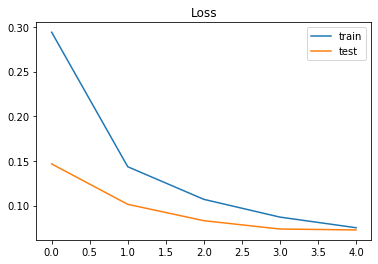

10000/10000 - 0s - loss: 0.0728 - acc: 0.9767


[0.07282235651132651, 0.9767]

In [29]:
history = model.fit(x_train, y_train, epochs=5, 
                    validation_data=(x_test, y_test))
model.summary()
import matplotlib.pyplot as plt
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

model.evaluate(x_test,  y_test, verbose=2)

In [30]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Exploratatory data analysis (EDA) - imshow, shape

(28, 28)

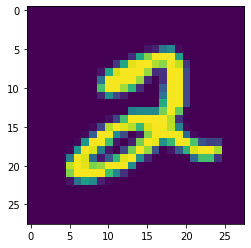

In [31]:
import matplotlib.pyplot as plt
plt.imshow(x_train[1])
plt.imshow(x_train[5])
x_train.shape
x_train[1].shape

# Scaling - keras.utils.normalizer(x_train, axis=1)

In [32]:
from keras.utils import normalize
x_train = normalize(x_train, axis=1)
x_test = normalize(x_test, axis=1)

In [33]:
print(f'{x_train},\n\n{x_test}')

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]],

[[[0. 0.

# Seuquential layers - 1 flatten layer, dense with 128 nodes,

In [34]:
from keras.models import Sequential
from keras.layers import Flatten, Dense

# model preparation

In [35]:
model = Sequential()
model.add(Flatten(input_shape=((28,28))))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(10,activation='softmax'))

In [36]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# Fit - 3 epochs

In [37]:
from keras.callbacks import TensorBoard
tensorboard = TensorBoard(log_dir='logs/')
history = model.fit(x_train, 
                    y_train, 
                    validation_data=(x_test, y_test),
                    epochs=3,
                    callbacks=[tensorboard]) # 몇번 반복할 것인지
history

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 4s 75us/step - loss: 0.3097 - acc: 0.9138 - val_loss: 0.1762 - val_acc: 0.9475
Epoch 2/3
60000/60000 [==============================] - 4s 74us/step - loss: 0.1396 - acc: 0.9595 - val_loss: 0.1193 - val_acc: 0.9648
Epoch 3/3
60000/60000 [==============================] - 4s 70us/step - loss: 0.0965 - acc: 0.9713 - val_loss: 0.1028 - val_acc: 0.9674


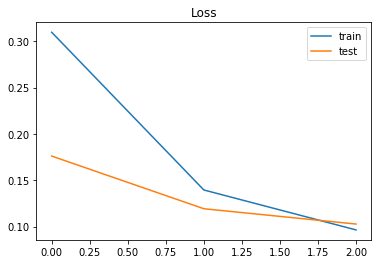

[0.10279117064774036, 0.9674]

In [38]:
import matplotlib.pyplot as plt
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

model.evaluate(x_test,  y_test, verbose=2)

# Prediction

In [39]:
model.predict(x_test)

array([[2.3904644e-08, 6.6396089e-10, 1.8907995e-05, ..., 9.9994218e-01,
        4.0884444e-07, 6.5193188e-07],
       [9.4134748e-06, 6.6251599e-04, 9.9902844e-01, ..., 1.7796332e-11,
        1.1693472e-05, 4.3396259e-10],
       [1.8952531e-05, 9.9785304e-01, 3.4443242e-04, ..., 4.7879791e-04,
        8.3541899e-04, 1.6277356e-05],
       ...,
       [4.9816133e-08, 1.4701662e-07, 1.3703378e-07, ..., 1.9065262e-04,
        4.5185979e-04, 2.4476429e-03],
       [7.0988563e-07, 3.5880699e-08, 2.9267666e-08, ..., 5.7027796e-07,
        4.1847161e-05, 1.5091068e-08],
       [4.2238476e-06, 2.7926610e-08, 4.8058890e-05, ..., 8.8899071e-10,
        8.3595900e-08, 7.0421123e-08]], dtype=float32)

# Evaluation

In [40]:
score = model.evaluate(x_test, y_test)
print(f'test loss: {score[0]}\ntest accuracy: {score[1]}')

10000/10000 [==============================] - 0s 22us/step
test loss: 0.10279117064774036
test accuracy: 0.9674


In [41]:
model.save('cnn_model1.model')

In [42]:
from keras.models import load_model
m = load_model('cnn_model1.model')
x_test = x_test.reshape(10000,28,28,1)
x_test.shape

(10000, 28, 28, 1)